<a href="https://colab.research.google.com/github/emmanuelngenzirabona/Boot_Camp_Ammi_2021/blob/main/DenseNet-Implemetation_Ammi_Bootcamp_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presented by Emmanuel NGENZIRABONA, on August 27, 2021

#Code Implementation: DenseNet
## *Tensorflow-DenseNet Architecture:
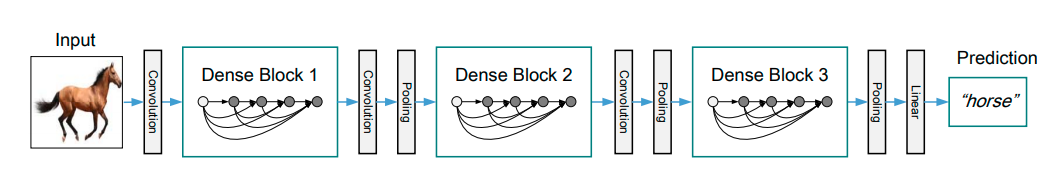

Note that, the DenseNet architecture applicable to CIFAR-10 is differ from the architecture table presented in the paper, and we present it in the figure below.
## **DenseNet architecture for CIFAR-10
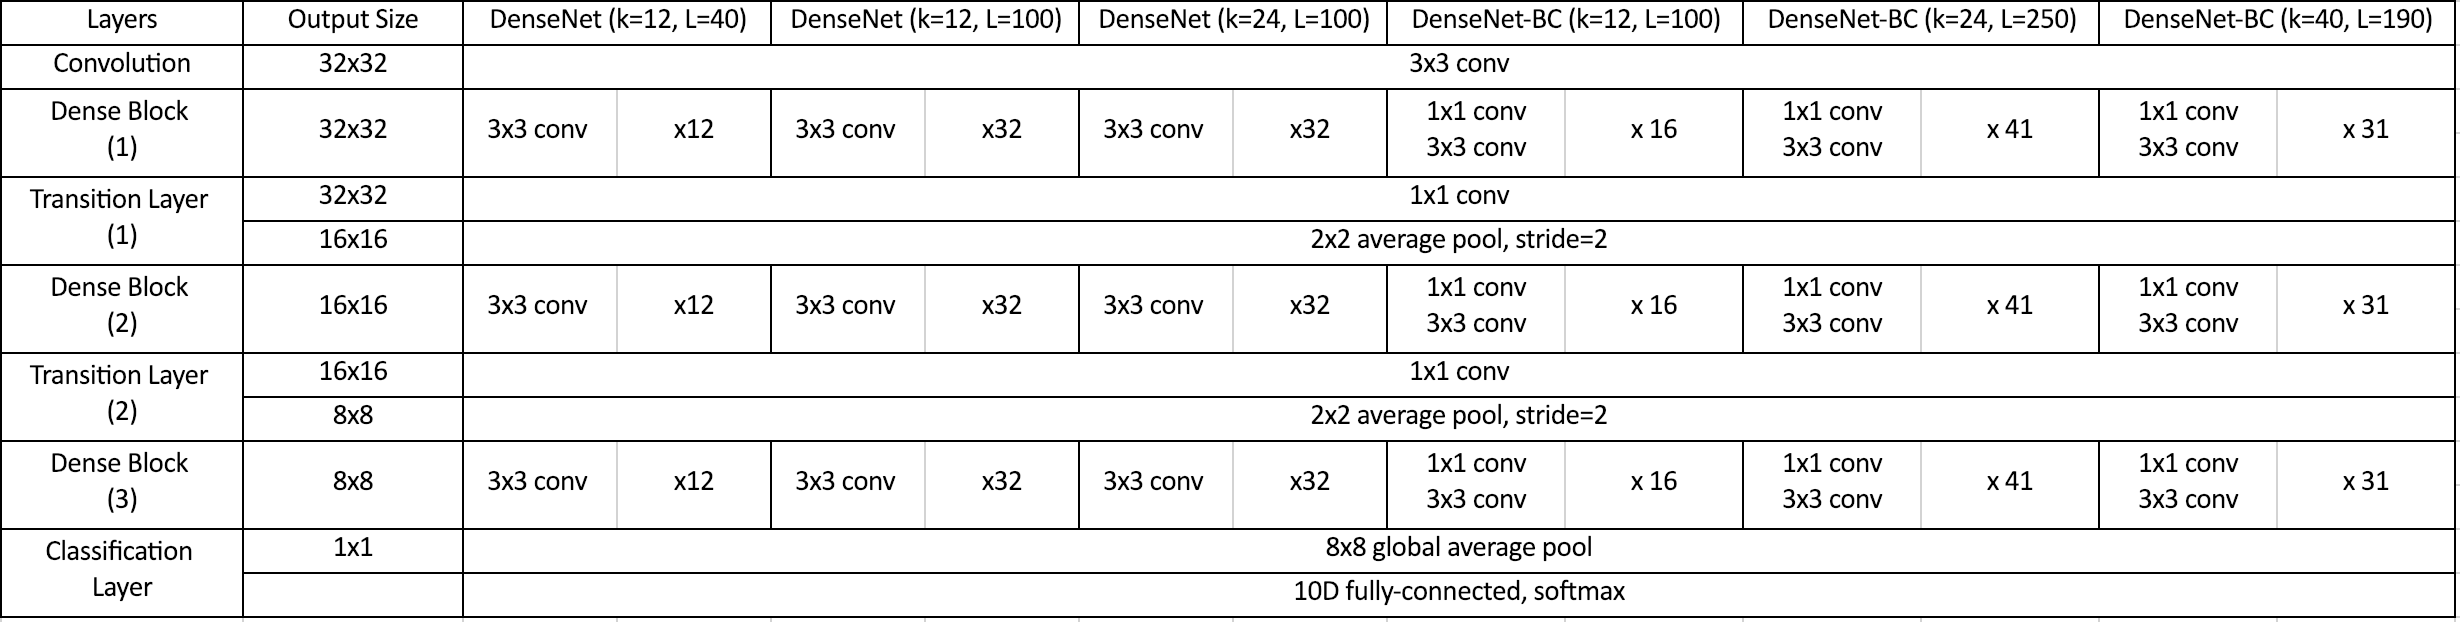

## Define the model

In [ ]:
import tensorflow
from tensorflow.keras import Model 
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, \
     Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate


def bn_rl_conv(x, filters, kernel_size):
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(filters=filters,
                kernel_size=kernel_size,
                padding='same')(x)
  return x

def dense_block(tensor, k, repetitions):
  for _ in range(repetitions):
    x = bn_rl_conv(tensor, filters=4*k, kernel_size=1)
    x = bn_rl_conv(x, filters=k, kernel_size=3)
    tensor = Concatenate()([tensor, x])
  return tensor


def transition_layer(x, theta):
    f = int(tensorflow.keras.backend.int_shape(x)[-1] * theta)
    x = bn_rl_conv(x, filters=f, kernel_size=1)
    x = AvgPool2D(pool_size=2, strides=2, padding='same')(x)
    return x


def create_densenet(input_shape, repetitions, k=32, theta=0.5):

  input = Input(input_shape)

  x = Conv2D(2*k, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)

  for reps in repetitions:
    d = dense_block(x, k, reps)
    x = transition_layer(d, theta)
  x = GlobalAvgPool2D()(d)
  
  final_output = Dense(10, activation='softmax')(x)

  DenseNet = Model(input, final_output)

  return DenseNet




k = 32
theta = 0.5
repetitions = 6, 12, 24, 16
input_shape = 32, 32, 3

densenet_model = create_densenet(input_shape, repetitions)



In [ ]:
densenet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_136 (Conv2D)             (None, 16, 16, 64)   9472        input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_136[0][0]                 
__________________________________________________________________________________________________
batch_normalization_132 (BatchN (None, 8, 8, 64)     256         max_pooling2d_4[0][0]            
____________________________________________________________________________________________

## Model training

In [ ]:
#Configure the model for training, set the optimizer, loss and accuracy
densenet_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.9), metrics=[ 'acc' ])


In [ ]:
#define the dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
y_train.shape

(50000, 10)

In [ ]:
densenet_model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/2
782/782 [==============================] - 136s 121ms/step - loss: 1.6531 - acc: 0.3932 - val_loss: 2.0778 - val_acc: 0.3057
Epoch 2/2
782/782 [==============================] - 91s 116ms/step - loss: 1.3372 - acc: 0.5130 - val_loss: 1.9225 - val_acc: 0.3535


## Evaluation

In [ ]:
res = densenet_model.evaluate(x_test, y_test, batch_size=64)

print('Loss :', res[0])
print('Accuracy: ',res[1] * 100,'%')

157/157 [==============================] - 6s 38ms/step - loss: 1.9225 - acc: 0.3535
Loss : 1.9225205183029175
Accuracy:  35.350000858306885 %
